## Conjunto de dados de classificação de dígitos manuscritos MNIST

O conjunto de dados MNIST é um acrônimo que significa o conjunto de dados do Instituto Nacional de Padrões e Tecnologia Modificado.

É um conjunto de dados de 60.000 pequenas imagens quadradas de 28 × 28 pixels em tons de cinza de dígitos manuscritos entre 0 e 9.

A tarefa é classificar uma determinada imagem de um dígito manuscrito em uma das 10 classes que representam valores inteiros de 0 a 9, inclusive.

In [56]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
#carregando o dataset
df_mnist = tf.keras.datasets.mnist
#o conjunto de dados já possui um conjunto de dados de treinamento e teste bem definido que podemos usar
(x_train, y_train), (x_test, y_test) = df_mnist.load_data()

In [58]:
#Verificando o shape dos dados
print("Imagens de Treino:" ,len(x_train))
print("Imagens de Treino:" ,x_train.shape)
print("Imagens de Teste:" ,x_test.shape)
print("Classes de Treino:" ,y_test.shape)

Imagens de Treino: 60000
Imagens de Treino: (60000, 28, 28)
Imagens de Teste: (10000, 28, 28)
Classes de Treino: (10000,)


In [59]:
#quantidade de classes diferentes nas labels
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

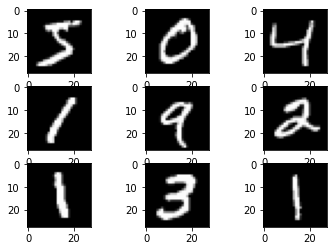

In [60]:
#plotando as primeiras imagens
for i in range(9):
	# definindo o subplot
	plt.subplot(330 + 1 + i)
	# plot dados de pixel
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

- Podemos ver que existem 60.000 exemplos no conjunto de dados de treinamento e 10.000 no conjunto de dados de teste e que as imagens são de fato quadradas com 28×28 pixels.

- Um gráfico das primeiras nove imagens no conjunto de dados também é criado, mostrando a imagem manuscrita natural das imagens.

In [61]:
#reshape do dataset para um único canal
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) #redefinindo o formato para 1 vetor
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [62]:
#verificando a mudança
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [63]:
#Verificando o máximo e mínimo dos dados
print('Máximo valor nos dados de treinamento:' , np.amax(x_train), '\nMinímo valor nos dados de treinamento:', np.amin(x_train))
print('Máximo valor nos dados de teste:', np.amax(x_test),'\nMínimo valor nos dados de teste:', np.amin(x_test))

Máximo valor nos dados de treinamento: 255 
Minímo valor nos dados de treinamento: 0
Máximo valor nos dados de teste: 255 
Mínimo valor nos dados de teste: 0


Sabemos que os valores de pixel para cada imagem no conjunto de dados são inteiros entre 0 e 255.

Assim, um bom ponto de partida é normalizar os valores de pixel das imagens para o intervalo entre 0 e 1. Isso envolve dividir os valores de pixel pelo valor máximo.

In [64]:
# normalizando os dados
x_train = x_train / 255
x_test = x_test / 255

#### Definindo o Modelo de Rede Neural Convolucional (CNN)

In [65]:
#definir e avaliar o modelo
model = tf.keras.Sequential([
                                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]), #convolve a imagem usando 32 filtros e cada tamanho 3, 3
                                        tf.keras.layers.Activation("relu"),
                                        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),#analisa diversos ângulos da imagem
                                        tf.keras.layers.Conv2D(32, (4, 4), activation='relu'),
                                        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(100, activation='relu'), #camada oculta
                                        tf.keras.layers.Dense(10, activation='softmax') #camada oculta
                                    ])

In [66]:
#compilar o modelo
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy']
            )

In [67]:
#treinando o modelo
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10


/Users/danilomedeiros/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 29s 15ms/step - loss: 0.1345 - accuracy: 0.9599
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0438 - accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0307 - accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0235 - accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0163 - accuracy: 0.9945
Epoch 6/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0136 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0104 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0105 - accuracy: 0.9964
Epoch 9/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0060 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 27s 14ms/step - lo

In [68]:
#avaliando a performance
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Acuracia do modelo no conjunto de teste: {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0385 - accuracy: 0.9901
Acuracia do modelo no conjunto de teste: 0.9901000261306763


In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_1 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)              

### Matriz de Confusão

In [70]:
#predições
y_probs = model.predict(x_test)

#convertendo probabilidades para inteiro
y_preds = y_probs.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [71]:
#matriz de confusão
from sklearn.metrics import confusion_matrix

confusao = confusion_matrix(y_preds, y_test)

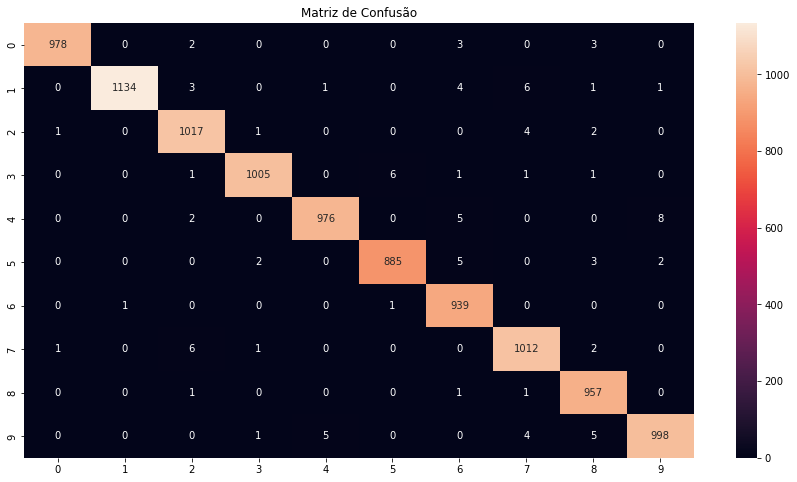

In [72]:
#plotando com seaborn para melhor visualização da matriz
plt.figure(figsize = (15,8))
sns.heatmap(confusao, annot=True, fmt='d')
plt.title("Matriz de Confusão")
plt.show()

Algumas observações dos maiores erros do modelo

- O modelo confundiu 5 vezes os números 5 e 4 com o número 6.
- Observamos também a confusão entre o 9 e o 4, onde o modelo errou 5 vezes. E também entre o 9 e 8, onde houve 5 erros.
- Entre 5 e o 3, onde teve 6 erros.
- Entre o 2 e o 7 houve 6 erros.

Isso se dá pelo fato de os números serem escritos a mão, talves nem todos os números foram escritos de uma maneira que a IA entenda.

### Fazendo previsões com o modelo treinado

In [73]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [74]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [75]:
predictions[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.23196931, 0.08533674, 0.08533674],
      dtype=float32)

#### Visualização das Predições

In [76]:
index_teste = 800

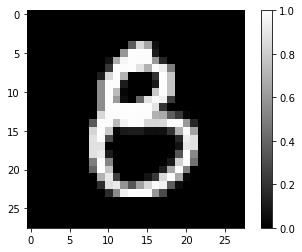

In [77]:
# Visualizando a primeira imagem do conjunto de treinamento
plt.figure()
plt.imshow(x_test[index_teste], cmap='gray')
plt.colorbar()
plt.show()

In [78]:
predictions[index_teste]

array([0.08533677, 0.08533677, 0.08533677, 0.08533696, 0.08533677,
       0.08533677, 0.0853368 , 0.08533677, 0.23196875, 0.08533681],
      dtype=float32)

In [79]:
# O método np.argmax() retorna o indice do maior valor da lista de 10 elementos que sai do nosso modelo.
# Com isso, podemos checar qual a label predita
np.argmax(predictions[index_teste])

8

313/313 [==============================] - 1s 2ms/step


'Predicted label is: 1'

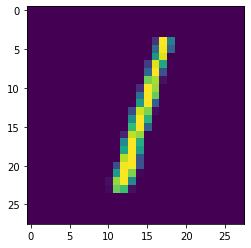

In [80]:
#visualizando predições do conjunto de teste
y_test = model.predict(x_test)

y_test = np.argmax(y_test, axis=1)
plt.imshow(x_test[2])
f'Predicted label is: {y_test[2]}'

313/313 [==============================] - 1s 2ms/step


'Predicted label is: 3'

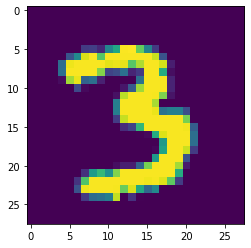

In [81]:
y_test = model.predict(x_test)

y_test = np.argmax(y_test, axis=1)
plt.imshow(x_test[500])
f'Predicted label is: {y_test[500]}'

313/313 [==============================] - 1s 2ms/step


'Predicted label is: 9'

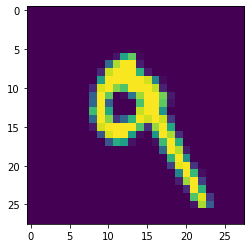

In [83]:
y_test = model.predict(x_test)

y_test = np.argmax(y_test, axis=1)
plt.imshow(x_test[7])
f'Predicted label is: {y_test[7]}'

## Conclusão

Neste trabalho foi implementada uma rede neural convolucional para reconhecimento de dígitos utilizando o famoso dataset MNIST. A rede obteve uma alta acurácia de 99% no teste, indicando o sucesso da rede em generalizar o conhecimento aprendido do treino para amostras não vistas antes. 